In [1]:
import yt
import yt.units as unit
import matplotlib.pyplot as plt
from yt.analysis_modules.halo_analysis.api import *

/Users/Oleg/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-macosx-10.4-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
path='/Users/Oleg/Rockstar/'   ##Put here the directory where to find the file

In [4]:
ds1=yt.GadgetDataset(path+"snapshot_100")   ##Add name of file

yt : [INFO     ] 2017-02-28 12:59:36,116 Calculating time from 1.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2017-02-28 12:59:36,117 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-02-28 12:59:36,160 Parameters: current_time              = 4.2498606916e+17 s
yt : [INFO     ] 2017-02-28 12:59:36,161 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-02-28 12:59:36,162 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-02-28 12:59:36,164 Parameters: domain_right_edge         = [ 50000.  50000.  50000.]
yt : [INFO     ] 2017-02-28 12:59:36,165 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-02-28 12:59:36,165 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-02-28 12:59:36,166 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-02-28 12:59:36,166 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-02-28 12:59:36,167 Parameters: hubble_constant           = 0.7


In [5]:
p1 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')

yt : [INFO     ] 2017-02-28 12:59:36,179 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2017-02-28 12:59:36,554 Identified 1.469e+05 octs
yt : [INFO     ] 2017-02-28 12:59:37,033 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-28 12:59:37,034 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-28 12:59:37,038 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-28 12:59:37,040 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-28 12:59:37,043 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh


In [ ]:
p1.set_axes_unit('Mpc')
p1.set_unit('particle_mass', 'Msun/h')


In [7]:
halos  = yt.load(path+'halos_0.0.bin')

yt : [INFO     ] 2017-02-28 12:59:39,934 Parameters: current_time              = 4.24986071675e+17 s
yt : [INFO     ] 2017-02-28 12:59:39,935 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-02-28 12:59:39,939 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-02-28 12:59:39,940 Parameters: domain_right_edge         = [ 50.  50.  50.]
yt : [INFO     ] 2017-02-28 12:59:39,942 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-02-28 12:59:39,943 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-02-28 12:59:39,944 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-02-28 12:59:39,945 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-02-28 12:59:39,946 Parameters: hubble_constant           = 0.699999988079


In [8]:
hc = HaloCatalog(halos_ds = halos)
hc.load()

yt : [INFO     ] 2017-02-28 12:59:39,953 Allocating for 3.102e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-02-28 12:59:39,964 Identified 1.433e+03 octs


In [ ]:
p2 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p2.annotate_halos(hc)
p2.set_axes_unit('Mpc')
p2.set_unit('particle_mass', 'Msun/h')


In [10]:
import tempfile
import shutil
import os

tmpdir = tempfile.mkdtemp()

In [11]:
hc2 = HaloCatalog(data_ds = ds1, halos_ds= halos, 
                  output_dir = os.path.join(tmpdir,'halo_catalog'))

In [12]:
hc2.add_filter("quantity_value","particle_mass",">",1e14,"Msun/h")

In [13]:
hc2.create()

yt : [INFO     ] 2017-02-28 12:59:47,120 Saving halo catalog (3 halos) to /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmpq3t8C2/halo_catalog/halo_catalog.
yt : [INFO     ] 2017-02-28 12:59:47,121 Saving field data to yt dataset: /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmpq3t8C2/halo_catalog/halo_catalog.0.h5.


In [14]:
halos_ds1 = yt.load(os.path.join(tmpdir,'halo_catalog/halo_catalog.0.h5'))

hc_r = HaloCatalog(halos_ds=halos_ds1, 
                  output_dir=os.path.join(tmpdir,'halo_catalog'))
hc_r.load()

yt : [INFO     ] 2017-02-28 12:59:47,172 Parameters: current_time              = 4.24986071675e+17
yt : [INFO     ] 2017-02-28 12:59:47,173 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-02-28 12:59:47,174 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-02-28 12:59:47,175 Parameters: domain_right_edge         = [  2.20405545e+26   2.20405545e+26   2.20405545e+26]
yt : [INFO     ] 2017-02-28 12:59:47,176 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-02-28 12:59:47,177 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-02-28 12:59:47,178 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-02-28 12:59:47,179 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-02-28 12:59:47,180 Parameters: hubble_constant           = 0.699999988079
yt : [INFO     ] 2017-02-28 12:59:47,185 Allocating for 3.000e+00 particles (index particle type 'all')
yt : [INFO     ] 2017-0

In [ ]:
p3 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p3.annotate_halos(hc_r)
p3.set_axes_unit('Mpc')
p3.set_unit('particle_mass', 'Msun/h')


In [16]:
ad_halos = halos.all_data()

In [17]:
Halo_mass = ad_halos['halos','particle_mass']

In [18]:
print min(Halo_mass), max(Halo_mass)

9925960704.0 Msun/h 3.9771836724e+14 Msun/h


In [19]:
print np.size(Halo_mass)

3102


In [20]:
n = max(Halo_mass)/min(Halo_mass)
binin = (max(Halo_mass) - min(Halo_mass))/1e3
print binin 

3.97708441279e+11 Msun/h


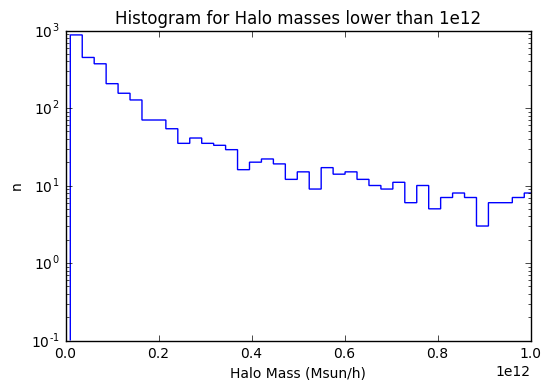

In [21]:
n2, bins, patches = plt.hist(Halo_mass, bins = 'auto', histtype='step',log=True) 
plt.axis([0., 1e12, 0.,1e3])
plt.xlabel('Halo Mass (Msun/h)')
plt.ylabel('n')
plt.title('Histogram for Halo masses lower than 1e12')

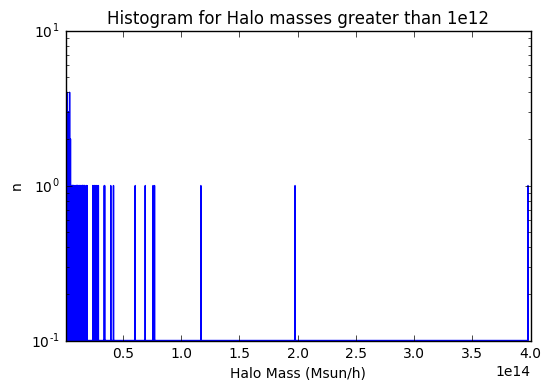

In [22]:
n2, bins, patches = plt.hist(Halo_mass, bins = 'auto', histtype='step',log=True) 
plt.axis([1e12, 4e14, 0.,1e1])
plt.xlabel('Halo Mass (Msun/h)')
plt.ylabel('n')
plt.title('Histogram for Halo masses greater than 1e12')